# <b>A. <span style='color:#0B2F9F'><code>PREFIX</code></span></b>
Prefix merupakan penggunaan awalan pada nama tabel untuk memberikan informasi tambahan atau untuk mengelompokkan objek-objek tertentu. Sebagai contoh perhatikan gambar berikut : <br><br>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/SQL%20-%20Prefix.png" width="50%">

<br><br>
Nama tabel dimisalkan (diberi alias) sebagai tbl, lalu untuk mengakses kolom pada tabel tersebut bisa diberi prefix tbl.kolom1 dan seterusnya

#### <i><b><span style='color:#55679C'>Quest</span> : Pada tabel customer_demography, ambil kolom customer_id, gender, age dan married namun gunakan alias 'cdm' pada nama tabel dan sematkan prefixnya saat mengakses kolom!</b></i>

In [ ]:
SELECT
  cdm.customer_id, cdm.gender, cdm.age, cdm.married
FROM
  `telco_chum.customer_demography` AS cdm

customer_id,gender,age,married
8779-QRDMV,Male,78,No
7495-OOKFY,Female,74,Yes
1658-BYGOY,Male,71,No
4598-XLKNJ,Female,78,Yes
4846-WHAFZ,Female,80,Yes
4412-YLTKF,Female,72,No
0390-DCFDQ,Female,76,Yes
3445-HXXGF,Male,66,Yes
2656-FMOKZ,Female,70,No
2070-FNEXE,Female,77,No


# <b>B. <span style='color:#0B2F9F'><code>JOIN</code></span></b>

Data biasanya disimpan di berbagai tabel atau sistem yang berbeda pada RDBMS (Relational Database Management System). JOIN memungkinkan pengguna untuk menggabungkan data dari berbagai sumber untuk mendapatkan gambaran yang lebih lengkap. Memahami query JOIN memungkinkan seorang pengguna untuk mengintegrasikan dan menganalisis data secara efektif, sehingga dapat meningkatkan kualitas analisis dan mendukung pengambilan keputusan berbasis data.

Operasi JOIN standar dapat dilakukan jika terdapat kunci pada tiap tabel yang saling terhubung. Operasi join dasar yang paling umum digunakan ada 4 yakni :
<ul>
    <li><b>LEFT JOIN</b></li>
    LEFT JOIN adalah jenis operasi penggabungan baris dari dua tabel, tetapi hanya mengembalikan semua baris dari tabel kiri (tabel pertama) dan baris yang cocok dari tabel kanan (tabel kedua). Jika tidak ada kecocokan di tabel kanan, maka nilai-nilai untuk kolom dari tabel kanan akan diisi dengan NULL.<br><br>
    <img src="https://thomasadventure.blog/img/left-join-extra.gif" width="20%">
    <br><br>
    <li><b>RIGHT JOIN</b></li>
    RIGHT JOIN adalah jenis operasi penggabungan baris dari dua tabel, tetapi hanya mengembalikan semua baris dari tabel kanan (tabel kedua) dan baris yang cocok dari tabel kiri (tabel pertama). Jika tidak ada kecocokan di tabel kiri, maka nilai-nilai untuk kolom dari tabel kiri akan diisi dengan NULL.<br><br>
    <img src="https://thomasadventure.blog/img/right-join.gif" width="20%">
    <br><br>
    <li><b>INNER JOIN</b></li>
    INNER JOIN adalah jenis operasi penggabungan yang hanya mengembalikan baris yang memiliki kecocokan di kedua tabel berdasarkan kriteria tertentu.<br><br>
    <img src="https://thomasadventure.blog/img/inner-join.gif" width="20%">
    <br><br>
     <li><b>FULL JOIN</b></li>
    FULL JOIN adalah jenis operasi penggabungan semua baris dari kedua tabel, baik yang memiliki kecocokan maupun yang tidak. Dengan demikian, hasilnya akan mencakup semua data dari tabel kiri dan tabel kanan.<br><br>
    <img src="https://thomasadventure.blog/img/full-join.gif" width="20%">
    <br><br>
</ul>

#### <i><b><span style='color:#55679C'>Pre-Quest</span>
Untuk melakukan join biasanya akan lebih mudah jika arsitektur relasi antar tabel atau biasa dikenal ERD (Entity Relational Diagram) telah dibuat atau diketahui. Pada data telco churn ERD-nya disajikan pada gambar berikut<br><br>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/ERD%20-%20Telco%20Churn.png" width="40%">

#### <i><b><span style='color:#55679C'>Quest : </span>Hitung berapa rata-rata biaya bulanan tiap status customer! Tampilkan status, total_customer, avg_monthly_charge! Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT
  sts.status,
  COUNT(sts.customer_id) AS total_customer,
  ROUND(AVG(srv.monthly_charge), 2) AS avg_monthly_charge
FROM
  `telco_chum.customer_status` sts
LEFT JOIN
  `telco_chum.telco_services` srv ON sts.customer_id = srv.customer_id
GROUP BY
  sts.status

status,total_customer,avg_monthly_charge
Churned,1869,74.44
Joined,454,43.47
Stayed,4720,62.98


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Hasil analisis menunjukkan bahwa pelanggan yang berhenti berlangganan (Churned) memiliki rata-rata biaya bulanan tertinggi 74.44, sementara pelanggan yang tetap berlangganan (Stayed) membayar lebih rendah 62.98, dan pelanggan baru (Joined) memiliki biaya terendah 43.47. Hal ini mengindikasikan bahwa pelanggan dengan biaya tinggi lebih rentan untuk churn, kemungkinan karena merasa layanan tidak sebanding dengan harga. Perusahaan dapat mengurangi churn dengan menawarkan diskon atau program loyalitas bagi pelanggan berbiaya tinggi serta meningkatkan nilai layanan untuk mempertahankan pelanggan.

#### <i><b><span style='color:#55679C'>Quest : </span>Coba Sudut Pandang Lebih Luas; Hitung berapa banyak customer, rata-rata biaya bulanan & rata-rata umur tiap status customer, gender dan status pernikahannya! Tampilkan status, gender, married, total_customer, avg_monthly_charge! Urutkan hasilnya per metrik perhitungan dan Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT
  c.status,
  b.gender,
  b.married,
  COUNT(a.customer_id) AS total_customer,
  AVG(a.monthly_charge) AS avg_monthly_charge,
FROM
  telco_chum.telco_services a
INNER JOIN
  `telco_chum.customer_demography` b ON a.customer_id = b.customer_id
INNER JOIN
  telco_chum.customer_status c ON c.customer_id = a.customer_id
GROUP BY
  c.status,
  b.gender,
  b.married
ORDER BY
  c.status,
  b.gender,
  b.married

status,gender,married,total_customer,avg_monthly_charge
Churned,Female,Yes,319,78.0
Churned,Female,No,620,73.17
Churned,Male,Yes,350,81.45
Churned,Male,No,580,69.61
Joined,Female,Yes,46,43.75
Joined,Female,No,165,43.47
Joined,Male,Yes,38,48.11
Joined,Male,No,205,42.55
Stayed,Female,Yes,1323,64.67
Stayed,Female,No,1015,61.51


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Pelanggan Churned cenderung memiliki biaya bulanan lebih tinggi dibandingkan pelanggan Stayed dan Joined, terutama pada laki-laki yang sudah menikah 81.45. Pelanggan laki-laki umumnya memiliki rata-rata biaya lebih tinggi dibandingkan perempuan dalam semua kategori status. Selain itu, pelanggan Stayed memiliki biaya bulanan lebih rendah, yang mengindikasikan bahwa pelanggan dengan paket lebih mahal lebih rentan untuk churn. Untuk mengurangi churn, perusahaan dapat menawarkan paket yang lebih fleksibel atau program loyalitas bagi pelanggan dengan biaya tinggi, terutama laki-laki yang sudah menikah.

#### <i><b><span style='color:#55679C'>Quest : </span>Bagaimana dengan total tenure ? Hitung berapa rata-rata tenure_in_month tiap status customer! Tampilkan status, total_customer, avg_tenure_in_month! Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT
  cs.status,
  COUNT(s.customer_id) AS total_customer,
  ROUND(AVG(s.tenure_in_months),2) AS avg_tenure_in_month
FROM
  `telco_chum.telco_services` AS s
LEFT JOIN
  `telco_chum.customer_status` AS cs ON s.customer_id = cs.customer_id
GROUP BY
  cs.status

status,total_customer,avg_tenure_in_month
Churned,1869,17.98
Joined,454,1.72
Stayed,4720,41.04


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Hasil analisis menunjukkan bahwa pelanggan yang churned memiliki rata-rata masa berlangganan terendah (17.98 bulan), sementara pelanggan yang tetap berlangganan (stayed) memiliki rata-rata tertinggi (41.04 bulan). Pelanggan yang baru bergabung (joined) memiliki masa berlangganan paling singkat (1.72 bulan), yang menunjukkan mereka masih dalam tahap awal penggunaan layanan.

Jika dilihat, pelanggan stayed - male - yes memiliki rata-rata tenure tertinggi (66.2 bulan), sedangkan pelanggan stayed - female - no memiliki tenure lebih rendah (61.51 bulan). Ini mengindikasikan bahwa pelanggan pria yang berlangganan paket tertentu cenderung bertahan lebih lama. Perusahaan dapat memanfaatkan pola ini untuk meningkatkan retensi pelanggan dengan menyesuaikan strategi loyalitas dan promosi berdasarkan segmentasi pelanggan.

#### <i><b><span style='color:#55679C'>Quest : </span>Perusahaan telekomunikasi ingin melakukan perluasan market ke beberapa daerah yang mana di daerah tersebut belum ada pelanggan terdaftar dalam database. Buatkan daftar kode pos pada tabel population yang sama sekali belum ada orang yang menggunakan layanan telekomunikasi! Tampilkan kode pos dan jumlah populasinya!

In [ ]:
SELECT
DISTINCT
  l.zip_code AS zip_code_from_cust,
  p.zip_code,
  p.population
FROM
  telco_chum.customer_location AS l
RIGHT JOIN
  telco_chum.population AS p ON l.zip_code = p.zip_code
WHERE
  l.zip_code IS NULL

zip_code,population,total_customer
91402,66249,0
95023,47514,0
90020,42394,0
92307,31876,0
93555,29782,0
95531,23792,0
92277,17178,0
96161,15783,0
93640,9174,0
96064,4592,0


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Hasil analisis menunjukkan bahwa terdapat 10 kode pos dengan populasi cukup besar tetapi belum memiliki pelanggan sama sekali. Kode pos dengan populasi tertinggi tanpa pelanggan adalah 91402 dengan 66.249 penduduk, diikuti oleh 95023 (47.514 penduduk) dan 90020 (42.394 penduduk). Hal ini menunjukkan adanya potensi pasar baru bagi perusahaan telekomunikasi untuk memperluas jangkauan layanan. Strategi pemasaran yang tepat, seperti promosi, diskon paket awal, atau kemitraan lokal, dapat membantu menarik pelanggan di wilayah-wilayah ini.

#### <i><b><span style='color:#55679C'>Quest 1 : </span> (From DQSquad) Berapa rata-rata CLTV (Customer Lifetime Value) pelanggan churn vs tidak churn!

In [ ]:
SELECT
    churn_label,
    ROUND(AVG(cltv), 2) AS avg_cltv
FROM
  `telco_chum.customer_status`
GROUP BY
  churn_label

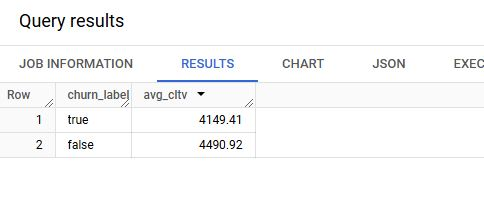

<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Hasil analisis menunjukkan bahwa pelanggan yang churn memiliki rata-rata Customer Lifetime Value (CLTV) sebesar 4149.41, sedangkan pelanggan yang tetap berlangganan memiliki CLTV yang lebih tinggi, yaitu 4490.92. Perbedaan ini mengindikasikan bahwa pelanggan yang churn cenderung memiliki kontribusi pendapatan yang lebih rendah dibandingkan dengan pelanggan yang tetap bertahan. Hal ini bisa disebabkan oleh masa berlangganan yang lebih singkat atau pengeluaran bulanan yang lebih kecil sebelum mereka berhenti menggunakan layanan. Untuk mengurangi churn dan meningkatkan CLTV, perusahaan dapat menerapkan strategi seperti menawarkan diskon atau promo eksklusif bagi pelanggan berisiko churn, meningkatkan kualitas layanan pelanggan, serta melakukan pendekatan proaktif terhadap pelanggan dengan CLTV rendah agar mereka tetap loyal. Dengan strategi yang tepat, perusahaan dapat mempertahankan pelanggan lebih lama dan memaksimalkan pendapatan dari setiap pelanggan.

#### <i><b><span style='color:#55679C'>Quest 2 : </span> (From DQSquad) Apa 5 kota dengan jumlah pelanggan churn terbanyak?

In [ ]:
SELECT
  cl.city,
  COUNT(cs.customer_id) AS total_churn
FROM
  telco_chum.customer_status cs
JOIN
  telco_chum.customer_location cl ON cs.customer_id = cl.customer_id
WHERE
  cs.churn_label = TRUE
GROUP BY
  cl.city
ORDER BY
  total_churn DESC
LIMIT
  5

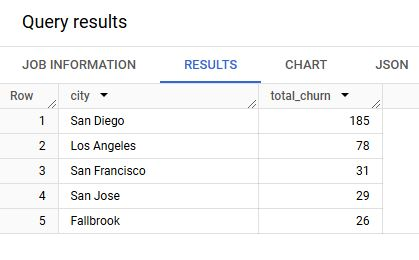

<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Hasil query menunjukkan lima kota dengan jumlah pelanggan churn (berhenti berlangganan) terbanyak. San Diego menempati posisi pertama dengan total 185 pelanggan yang churn, menjadikannya kota dengan tingkat churn tertinggi. Di posisi kedua, Los Angeles memiliki 78 pelanggan yang churn, diikuti oleh San Francisco dengan 31 pelanggan. San Jose berada di posisi keempat dengan 29 pelanggan churn, dan Fallbrook menutup daftar dengan 26 pelanggan yang berhenti berlangganan.

Dari data ini, dapat disimpulkan bahwa San Diego merupakan area yang perlu mendapat perhatian lebih dari perusahaan, karena memiliki jumlah pelanggan churn yang jauh lebih tinggi dibandingkan kota-kota lainnya. Perusahaan mungkin perlu melakukan analisis lebih mendalam terkait faktor-faktor yang menyebabkan tingginya churn di San Diego, seperti kualitas layanan, persaingan dengan provider lain, atau preferensi pelanggan di wilayah tersebut. Sementara itu, kota-kota seperti Los Angeles, San Francisco, San Jose, dan Fallbrook juga memerlukan strategi retensi pelanggan untuk mengurangi tingkat churn yang terjadi.

#### <i><b><span style='color:#55679C'>Quest 3 : </span> (From DQSquad) Hitung berapa banyak customer, rata-rata biaya bulanan, dan rata-rata umur untuk setiap status customer, gender, dan status pernikahannya! Tampilkan kolom status, gender, married, total_customer, avg_monthly_charge, dan avg_age. Urutkan hasilnya berdasarkan metrik perhitungan (misalnya, total_customer atau avg_monthly_charge)!

In [ ]:
SELECT
    cs.status,
    cd.gender,
    cd.married,
    COUNT(cs.customer_id) AS total_customer,
    ROUND(AVG(ts.monthly_charge),2) AS avg_monthly_charge,
    ROUND(AVG(cd.age),2) AS avg_age
FROM
  telco_chum.customer_status cs
JOIN
  telco_chum.customer_demography cd ON cs.customer_id = cd.customer_id
JOIN
  telco_chum.telco_services ts ON cs.customer_id = ts.customer_id
GROUP BY
  cs.status,
  cd.gender,
  cd.married
ORDER BY
  total_customer DESC

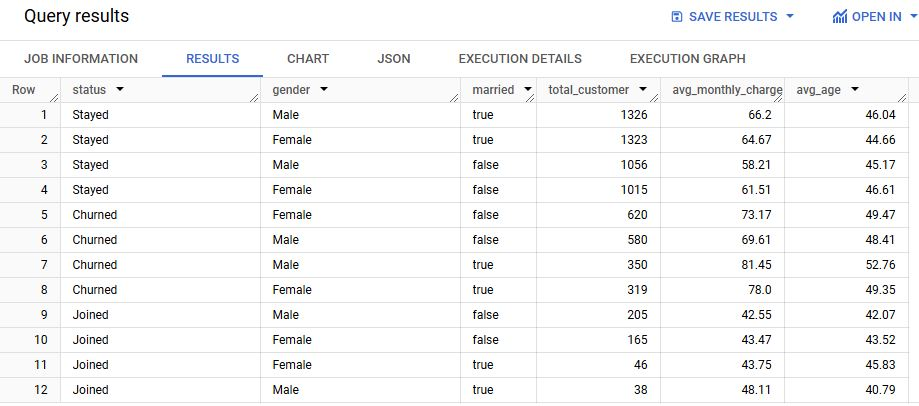

<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Pelanggan yang bertahan (Stayed) cenderung memiliki biaya bulanan yang lebih rendah dibandingkan pelanggan yang churn. Hal ini menunjukkan bahwa pelanggan dengan biaya bulanan tinggi lebih rentan untuk churn. Pelanggan yang churn memiliki rata-rata usia yang lebih tua dibandingkan pelanggan yang bertahan atau baru bergabung. Ini mungkin mengindikasikan bahwa pelanggan yang lebih tua kurang tertarik dengan layanan yang ditawarkan atau lebih sensitif terhadap harga. Pelanggan baru (Joined) cenderung lebih muda dan membayar biaya bulanan yang lebih rendah. Perusahaan perlu fokus pada strategi retensi untuk memastikan pelanggan baru ini tetap bertahan.

Perusahaan perlu mengevaluasi layanan dan harga untuk pelanggan dengan biaya bulanan tinggi, terutama yang sudah menikah, karena mereka cenderung lebih mungkin churn. Program loyalitas atau diskon khusus dapat diterapkan untuk pelanggan yang lebih tua untuk mengurangi tingkat churn. Untuk pelanggan baru, perusahaan dapat menawarkan paket layanan yang lebih menarik atau insentif untuk memastikan mereka tetap bertahan dalam jangka panjang.




---
Powered by : <br>
<img src="https://lh3.googleusercontent.com/ayfbbgvQolM_Ys9VYRVFD6FjDJXSebI9sN1VtY4ppp65dXepA6JCKgKMM_porWAErGQmc8l-L_RXq080SJ3FbYTIsyxYqWWTuAX8A3VtafWLUwAnnxNnjR1s-3BMCUlF34fYnViLuutxrLm3nEpoix0" width="20%">
<br><br>
<a href="https://www.linkedin.com/in/saputraarel/"><img src="https://img.shields.io/badge/-© 2025 Mochammad Azriel Rizky Syahputra-417DAC?style=for-the-badge&logoColor=white"/></a>